**ADS PublicSpace-Citibike Project**

# Regression Model Building and Evaluation

#### Assumptions: all variables are iid, normally distributed
#### ----Split data in training and testing sets (300 training, 226 test sets).
#### ----Using 2015 September ridership data. 

### 1. Possible Pattern in Data  
a. Test if the data follows a normal distributions 
    Q-Q plot - Quantile Quantile

b. Data Normalization ((d-mean)/std)
   Split both original and normalized datasets into training and testing sets
   
---------------
### 2. Model Fitting and Evaluation
a. Bi-variate regression on each regressors 
   Evaluate R-squared

b. Multivariate linear regression on all regressors
   Evaluate coefficients using p-values, R-squared and sum of residue squared
    
c. Ridge Regression (4 fold cv)
   Evaluate coefficients using p-values, R-squared and sum of residue squared

d. Lasso Regression (4 fold cv)
   Evaluate coefficients using p-values, R-squared and sum of residue squared

---------------
### 3. Further Study and Efforts
a*. OLS regression model with polynomial regressors(x)

b*. OLS regression model with transformed y 
   * Boxcox - to check if y should be transformed to polygomial or ln

-------------------------------------

In [2]:
import numpy as np
import pandas as pd
from pandas.stats.api import ols

#import Quandl
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Possible Pattern in Data

In [3]:
master = pd.read_csv('../data/processed/master.csv')

In [4]:
master.head()

,station_id,ridership_0115,ridership_0215,ridership_0315,ridership_0415,ridership_0515,ridership_0615,ridership_0715,ridership_0815,ridership_0915,...,ridership_1215,avg_ridership_2015,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,72,638.0,480.0,1026.0,1948.0,2943.0,2767.0,3149.0,3504.0,3667.0,...,1648.0,2131.615385,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807
1,79,566.0,335.0,725.0,1728.0,2368.0,2424.0,2626.0,2726.0,3011.0,...,1579.0,1760.538462,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631
2,82,310.0,276.0,406.0,788.0,1068.0,946.0,1193.0,1145.0,1166.0,...,713.0,766.538462,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511
3,83,258.0,162.0,281.0,749.0,1101.0,994.0,1659.0,1724.0,1505.0,...,717.0,863.307692,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231
4,116,1696.0,1193.0,2105.0,1933.0,2281.0,4800.0,5674.0,6175.0,6558.0,...,3686.0,3576.692308,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742


In [5]:
master.bike_lane_score.unique()

array([ 0.        ,  3.        ,  4.        ,  1.85714286,  2.5       ,
        2.        ,  1.        ,  2.33333333,  3.5       ,  4.33333333,
        3.66666667,  3.16666667,  3.125     ,  1.8       ,  3.8       ,
        5.        ,  4.3       ,  2.75      ,  3.25      ,  2.27272727,
        3.6       ,  2.66666667,  3.18181818,  3.4       ,  3.33333333,
        3.2       ,  1.66666667,  3.75      ,  1.5       ,  3.375     ,
        4.77777778,  2.2       ,  1.75      ,  4.71428571])

In [6]:
master.shape

(452, 22)

In [33]:
# Create a new data frame with stationID, riderships in month 6-10, and all study features
df0 = master[['station_id','ridership_0615','ridership_0715','ridership_0815','ridership_0915','ridership_1015',\
              'bike_lane_score', 'park', 'street_quality_score', 'subway_entrance', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density']]

In [34]:
df0.head(3)

,station_id,ridership_0615,ridership_0715,ridership_0815,ridership_0915,ridership_1015,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,72,2767.0,3149.0,3504.0,3667.0,3546.0,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807
1,79,2424.0,2626.0,2726.0,3011.0,2646.0,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631
2,82,946.0,1193.0,1145.0,1166.0,1053.0,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511


In [35]:
df0.subway_entrance.unique()

array([ 0.,  1.])

## a. Q-Q plot   ---(move to the  part b)
#### Check if data is normal
Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.

Generates a probability plot of sample data against the quantiles of a
specified theoretical distribution (the normal distribution by default).
`probplot` optionally calculates a best-fit line for the data

**---R-squared of data being normalaly distribuated--**
1. 'bike_lane_score' : R_2 = 0.81
2. 'park': R_2 = 0.63 -----------------> low value
3. 'street_quality_score': R_2 = 0.96
4. 'subway_entrance': R_2 = 0.39 ---> very low, not likely to be a normal distributions
5. 'tree_score' : R_2 = 0.95
6. 'traffic_volume': R_2 = 0.71
 
7. 'median_hh_income': R_2 = 0.81
8. 'pop_density': R_2 = 0.97

In [10]:
#sm.qqplot(df0.ix[:,6], fit=True, line='q', ax=None)

((array([ -2.96117551e+00,  -2.67653933e+00,  -2.51628594e+00,
          -2.40255243e+00,  -2.31336993e+00,  -2.23949821e+00,
          -2.17614091e+00,  -2.12047587e+00,  -2.07069676e+00,
          -2.02557504e+00,  -1.98423579e+00,  -1.94603306e+00,
          -1.91047582e+00,  -1.87718177e+00,  -1.84584720e+00,
          -1.81622671e+00,  -1.78811900e+00,  -1.76135687e+00,
          -1.73579986e+00,  -1.71132878e+00,  -1.68784157e+00,
          -1.66525018e+00,  -1.64347805e+00,  -1.62245822e+00,
          -1.60213174e+00,  -1.58244645e+00,  -1.56335594e+00,
          -1.54481877e+00,  -1.52679774e+00,  -1.50925933e+00,
          -1.49217326e+00,  -1.47551202e+00,  -1.45925059e+00,
          -1.44336614e+00,  -1.42783775e+00,  -1.41264621e+00,
          -1.39777387e+00,  -1.38320443e+00,  -1.36892283e+00,
          -1.35491510e+00,  -1.34116830e+00,  -1.32767037e+00,
          -1.31441010e+00,  -1.30137700e+00,  -1.28856128e+00,
          -1.27595378e+00,  -1.26354588e+00,  -1.251329

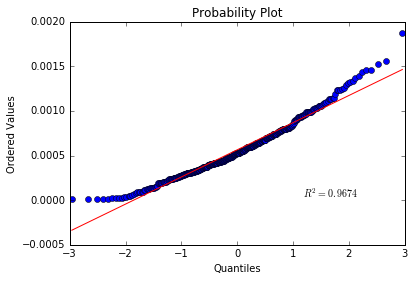

In [36]:
measurements = df0.ix[:,13]
stats.probplot(measurements, dist="norm", plot=plt)

### Based on the R-squared values of Q-Q plot, as the analyses will be based on the asssumption that the data follows a "normal distribution". However, we decide to keep "Park" and "Subway Entrances" as they are part of of "public space" quantifiers.

In [31]:
#df0 = df0.ix[:, ~df0.columns.isin(['park', 'subway_entrance'])]
#df0.head(3)

## b. Data Normalization

In [47]:
# Nomalize columns that are numeric(continuous values) 
# using (X - Xmin)/ (Xmax - Xmin)
df0_n = df0.copy()

In [48]:
def normalize1(df1, df0, col):
    col_mean = df0[col].mean()
    col_std = df0[col].std()
    df1[col] = df0[col].apply(lambda c: (c - col_mean) / col_std)
    return col_mean, col_std

In [49]:
# Create a dictionaly that stores all the max and min values of the selected columns' original values
col_n = ['ridership_0615', 'ridership_0715','ridership_0815', 'ridership_0915','ridership_1015',\
        'bike_lane_score', 'street_quality_score', 'tree_score', 'traffic_volume', 'median_hh_income', 'pop_density']
col_meanstd = {}
for c in col_n:
    vmean, vstd = normalize1(df0_n, df0, c)
    col_meanstd[c] = np.array([vmean, vstd])

In [50]:
df0_n.head()

,station_id,ridership_0615,ridership_0715,ridership_0815,ridership_0915,ridership_1015,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,72,-0.044803,-0.053536,0.290089,0.380089,0.450563,-1.037727,1.0,0.790673,0.0,-0.554668,0.001493,1.069154e-01,0.791144
1,79,-0.223134,-0.296086,-0.030448,0.089412,0.014532,0.722092,0.0,1.584334,1.0,-0.904716,-0.424358,2.130764e-15,0.218505
2,82,-0.991566,-0.960664,-0.681822,-0.728118,-0.757243,-1.037727,1.0,-0.135265,0.0,0.240854,0.155045,-3.670914e-01,-0.170810
3,83,-0.966611,-0.744548,-0.443273,-0.577905,-0.732535,-1.037727,0.0,0.096220,0.0,-1.334880,2.144695,-3.877741e-02,-1.079345
4,116,1.012182,1.117474,1.390545,1.661106,1.554691,1.308698,1.0,1.485126,0.0,0.813900,0.086690,5.403333e-01,0.581773


In [51]:
col_meanstd = pd.DataFrame(col_meanstd.items(), columns=['column', 'mean_std'])

In [52]:
col_meanstd

,column,mean_std
0,traffic_volume,"[14851.6123426, 12647.1984179]"
1,ridership_0915,"[2809.21596244, 2256.80019503]"
2,street_quality_score,"[7.43072263697, 0.719991027548]"
3,pop_density,"[0.000563480999822, 0.000307600288934]"
4,ridership_0615,"[2853.17434211, 1923.39534573]"
5,bike_lane_score,"[1.76903484912, 1.70472136158]"
6,ridership_0715,"[3264.43831169, 2156.25780748]"
7,ridership_0815,"[2799.9025641, 2427.17614563]"
8,tree_score,"[29.7097648459, 22.2565097196]"
9,ridership_1015,"[2616.00456621, 2064.07254231]"


In [55]:
# Using 2015/09 diership and the original fator data to run regression
lm = smf.ols(formula = 'ridership_0915 ~ \
                  bike_lane_score + park + street_quality_score + subway_entrance + tree_score + traffic_volume + \
                  median_hh_income + pop_density', \
                        data = df0).fit()

In [56]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ridership_0915   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     15.01
Date:                Thu, 08 Dec 2016   Prob (F-statistic):           2.25e-19
Time:                        13:27:15   Log-Likelihood:                -3839.5
No. Observations:                 426   AIC:                             7697.
Df Residuals:                     417   BIC:                             7734.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              152.8324   1092.630      0.140      0.889     -1994.917  2300.582
bike_lane_score        255.1303     58.344      4.373      0.000       140.445   369.816
park                    55.3926    154.598      0.358      0.720      -248.496   359.281
street_quality_score   -46.4576    139.690     -0.333      0.740      -321.043   228.127
subway_entrance       1074.3487    303.004      3.546      0.000       478.744  1669.954
tree_score              -8.6051      4.769     -1.804      0.072       -17.979     0.769
traffic_volume           0.0011      0.008      0.144      0.885        -0.014     0.017
median_hh_income         0.0200      0.003      6.827      0.000         0.014     0.026
pop_density           1.602e+06   3.45e+05      4.646      0.000      9.24e+05  2.28e+06
==============================================================================
Omnibus:                       87.393   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.557
Skew:                           1.097   Prob(JB):                     1.69e-39
Kurtosis:                       5.291   Cond. No.                     3.32e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The R-squared is too small

### Set Training and Testing Sets - with built-in cross validation (4 folds)

In [66]:
# drop nan-- normalized data
df0_nV = df0_n.dropna(subset=['ridership_0915', 'bike_lane_score', 'park', 'street_quality_score', 'subway_entrance', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density'])
df0_nV.shape

(426, 14)

In [67]:
# # drop nan-- original data
df0_V = df0.dropna(subset=['ridership_0915', 'bike_lane_score', 'park', 'street_quality_score', 'subway_entrance', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density'])
df0_V.shape

(426, 14)

In [104]:
######## Set traning and Testing sets on normalized data
X0n = df0_nV[['bike_lane_score', 'park', 'street_quality_score', 'subway_entrance', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density']]
y0n = df0_nV[['ridership_0915']]

In [105]:
X0n.shape

(426, 8)

In [106]:
# for standardized data
X0n_train, X0n_test, y0n_train, y0n_test = train_test_split(X0n, y0n, test_size = 0.295, random_state = 222)

X0n_train.shape, X0n_test.shape, y0n_train.shape, y0n_test.shape

((300, 8), (126, 8), (300, 1), (126, 1))

In [107]:
# Stack X0n and y0n for convience
Xyn_train = pd.concat([y0n_train, X0n_train], axis=1)
Xyn_test = pd.concat([y0n_test, X0n_test], axis=1)
Xyn_test.head(3)

,ridership_0915,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
1,0.089412,0.722092,0.0,1.584334,1.0,-0.904716,-0.424358,2.130764e-15,0.218505
130,-0.171577,0.428789,1.0,-0.320452,0.0,0.272101,-0.925313,-1.568420e+00,-0.480990
103,0.611390,1.308698,0.0,1.137899,0.0,0.433821,0.590043,3.221601e-01,1.202927


In [108]:
######## Set traning and Testing sets on original data
X0 = df0_V[['bike_lane_score', 'park', 'street_quality_score', 'subway_entrance', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density']]
y0 = df0_V[['ridership_0915']]

In [109]:
# for original data
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.295, random_state = 222)
# Check the shapes of each 
X0_train.shape, X0_test.shape, y0_train.shape, y0_test.shape

((300, 8), (126, 8), (300, 1), (126, 1))

In [110]:
# Stack X0 and y0 for convience
Xy_train = pd.concat([y0_train, X0_train], axis=1)
Xy_test = pd.concat([y0_test, X0_test], axis=1)
Xy_train.head(3)

,ridership_0915,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
399,1578.0,0.0,1.0,7.0,0.0,64.477039,22588.0,86523.139535,0.000640
331,162.0,0.0,1.0,7.5,0.0,64.420062,11251.0,30686.000000,0.000492
194,4546.0,3.0,0.0,7.5,0.0,62.746180,5462.0,61154.000000,0.000809


# 2.  Model Fitting and Evaluation

## a. Run bi-variate regression 8 times and check their fitted coefficients respectively.
   
   * $y = coef_i * x_i + intercept_i$  (i from 1 to 8)

In [141]:
publicspace_factor = ['bike_lane_score', 'park', 'street_quality_score', 'subway_entrance', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density']

dic_lm = {} # for creating table
dic_lm0 = {} # for storing models 
for i in xrange(0, 8):
    lm_ = smf.ols(formula = 'ridership_0915 ~ %s'%(publicspace_factor[i]), data = Xy_train).fit()
    dic_lm[publicspace_factor[i]] = [lm_.params[1], lm_.pvalues.values[1], \
                                     lm_.params[0],lm_.pvalues.values[0], \
                                     lm_.rsquared]
    
    # If want to print out the result as a list:
    dic_lm0[i] = lm_
    #print "\nFeature: {1}\n coef{0} = {2}, intercept{0} = {3}".format(i, publicspace_factor[i], dic_lm[i].params[1], dic_lm[i].params[0])
    #print "p-values: \n{0}, \n R-squared = {1}".format(dic_lm[i].pvalues, dic_lm[i].rsquared)

df_lm = pd.DataFrame.from_dict(dic_lm)
df_lm.index = (['coefficient','coeff_p-value','intercept', 'intcp_p-value','r-squared'])

In [142]:
df_lm

,bike_lane_score,median_hh_income,park,pop_density,street_quality_score,subway_entrance,traffic_volume,tree_score
coefficient,2.513414e+02,2.579756e-02,-4.104439e+01,1.520494e+06,-53.260821,1.474019e+03,1.048558e-02,-5.678828e+00
coeff_p-value,1.405269e-03,1.047342e-11,8.418401e-01,7.916850e-04,0.769902,4.170732e-04,3.594126e-01,3.386248e-01
intercept,2.299784e+03,5.547822e+02,2.771770e+03,1.905288e+03,3151.014650,2.588981e+03,2.605509e+03,2.921870e+03
intcp_p-value,5.245604e-27,9.842604e-02,5.008318e-49,8.741039e-11,0.020785,7.140759e-52,1.786979e-28,2.912760e-32
r-squared,3.370074e-02,1.439425e-01,1.338273e-04,3.714321e-02,0.000288,4.099812e-02,2.819356e-03,3.073014e-03


In [138]:
# Save the table as a csv file
#df_lm.to_csv('../reports/figures/ols-bivar-regre-table.csv')

In [152]:
# To better visualize how well the fitted lines are with the datapoints, I used the normalized data
publicspace_factor = ['bike_lane_score', 'park', 'street_quality_score', 'subway_entrance', 'tree_score', 'traffic_volume',\
              'median_hh_income', 'pop_density']

dic_lm0_n = {} # for storing models 
for i in xrange(0, 8):
    lm_ = smf.ols(formula = 'ridership_0915 ~ %s'%(publicspace_factor[i]), data = Xyn_train).fit()    
    dic_lm0_n[i] = lm_  # Storethe result as a list:

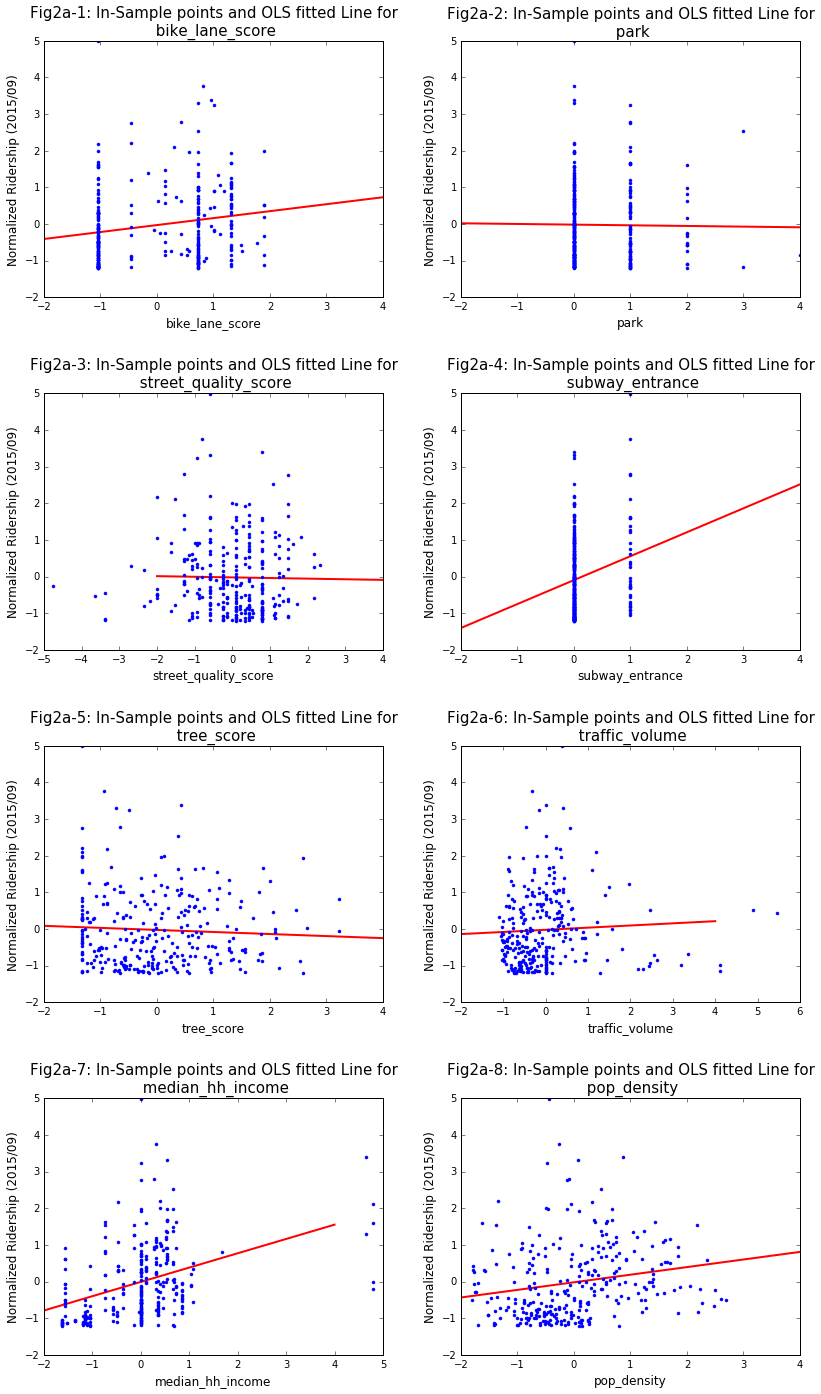

In [280]:
# Plot data points and model line for each factor (using Normaliaed Data)
fig = plt.figure(figsize=(12,20))

for i in range(0,8):
    plt.subplot(421+i)
    xfit = np.linspace(-2, 4, 200)
    yfit = xfit * dic_lm0_n[i].params[1] + dic_lm0_n[i].params[0]
    plt.plot(xfit, yfit, 'r',linewidth=2)
    plt.plot(Xyn_train[publicspace_factor[i]], Xyn_train.ridership_0915, '.')
    
    plt.title('Fig2a-{}: In-Sample points and OLS fitted Line for\n {}'.format(i+1, publicspace_factor[i]), fontsize=15)
    plt.xlabel('{}'.format(publicspace_factor[i]), fontsize=12)
    plt.ylabel('Normalized Ridership (2015/09)', fontsize=12)
    plt.tight_layout(pad=3)

In [281]:
fig.savefig('../reports/figures/3.1-kz-OLS Bi-variate Regressions Figures.png')

## b. Run multivariate regression

In [276]:
# Run OLS regression on 
lm0 = smf.ols(formula = 'ridership_0915 ~ \
                        bike_lane_score + park + street_quality_score + \
                        + subway_entrance + tree_score + traffic_volume + \
                        median_hh_income + pop_density', \
                        data = Xy_train).fit()

In [277]:
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ridership_0915   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     10.59
Date:                Sun, 11 Dec 2016   Prob (F-statistic):           4.71e-13
Time:                        23:06:39   Log-Likelihood:                -2710.6
No. Observations:                 300   AIC:                             5439.
Df Residuals:                     291   BIC:                             5472.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             -311.8957   1304.853     -0.239      0.811     -2880.042  2256.251
bike_lane_score        239.5098     72.837      3.288      0.001        96.155   382.864
park                    75.3324    187.340      0.402      0.688      -293.381   444.046
street_quality_score    15.6001    165.723      0.094      0.925      -310.567   341.767
subway_entrance       1142.8595    398.152      2.870      0.004       359.237  1926.482
tree_score              -9.9558      5.761     -1.728      0.085       -21.295     1.383
traffic_volume          -0.0015      0.010     -0.147      0.883        -0.022     0.019
median_hh_income         0.0217      0.004      5.842      0.000         0.014     0.029
pop_density           1.462e+06   4.29e+05      3.406      0.001      6.17e+05  2.31e+06
==============================================================================
Omnibus:                       80.316   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.823
Skew:                           1.288   Prob(JB):                     6.03e-42
Kurtosis:                       5.924   Cond. No.                     3.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS Regression Model:
$$
ridership = 239.510 \times bike\_lane\_score + 75.332 \times park + 15.600 \times street\_quality\_score + 1142.860 \times subway\_entrance - 9.956 \times tree\_score - 0.002 \times traffic\_volume + 0.022 \times median\_hh\_income + 1462000 \times pop\_density - 311.896
$$

### Model Evaluation

In [164]:
# Test In-Sample and OutofSample RSS and R^2
y0_pred_IS = lm0.predict(X0_train)
err_IS = (y0_pred_IS - np.asarray(y0_train).T).T
RSS_IS = sum(err_IS**2)
R_2_IS = 1 - np.var(err_IS)/np.var(y0_train)
print("The Residual sum of square for OLS regression is: {0}\nThe R-squared is: {1}".format(RSS_IS, R_2_IS))

y0_pred_OS = lm0.predict(X0_test) #compute the prediction for the test sample 
err_OS = (y0_pred_OS - np.asarray(y0_test).T).T
RSS_OS = sum(err_OS**2)
R_2_OS = 1 - np.var(err_OS)/np.var(y0_test)

print("\nThe Residual sum of square for OLS regression is: {0}\nThe R-squared is: {1}".format(RSS_OS, R_2_OS))


The Residual sum of square for OLS regression is: 1237417993.53
The R-squared is: ridership_0915    0.225476
dtype: float64

The Residual sum of square for OLS regression is: 447676050.035
The R-squared is: ridership_0915    0.207784
dtype: float64


#### -- The R-squared are low and the sum of residue are high in both in-sample and out_sample tests. --

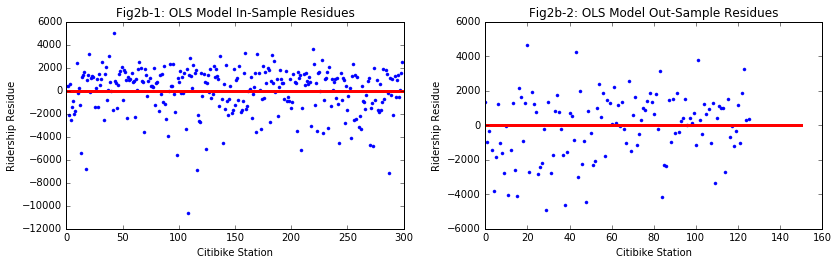

In [251]:
# Plot Residues
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121, title='Fig2b-1: OLS Model In-Sample Residues',\
                      xlabel='Citibike Station', ylabel='Ridership Residue')
ax1.plot(err_IS, '.')
ax1.plot([0,300], [0,0], 'r',linewidth=3)

ax2 = fig.add_subplot(122, title='Fig2b-2: OLS Model Out-Sample Residues',\
                     xlabel='Citibike Station', ylabel='Ridership Residue')
ax2.plot(err_OS, '.')
ax2.plot([0,150], [0,0], 'r',linewidth=3)

fig.tight_layout(pad= 2)


**Figure 2b-1, 2b-2**: The residues in both graphs are not evenly distributed along the sizes of the 0 horizontal line. This means that the our OLS multi-variate model does not fit the data well as we expected. It might be due to undectected outliers or that the correlation between the ridership and the public space factors is weak.

In [252]:
fig.savefig('../reports/figures/3.1-kz-OLS-Multiv Regression IS & OS Residue Figures.png')

## c. Ridge Regression

In [262]:
# 4 fold cross-validation
# potential lambdas 0.1, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50, 80, 1e2, 2*1e2, 5*1e2, 8*1e2, 1e3

Ridge = linear_model.RidgeCV(fit_intercept=True, normalize=True, cv=4, store_cv_values=False)

lm_r = Ridge.fit(X0_train, y0_train)

In [263]:
#linear_model.RidgeCV?

In [264]:
print ('Selected Lambda by 4 fold cross validation:\n {0} \
       \n\nRidge Model intercept: {1} \
       \nRidge Model coefficients: {2}'     
       .format(lm_r.alpha_, lm_r.intercept_, lm_r.coef_))

Selected Lambda by 4 fold cross validation:
 10.0        

Ridge Model intercept: [ 108.46800774]        
Ridge Model coefficients: [[  2.24611141e+02   8.80906142e+01   3.31529798e+01   7.91864909e+02
   -5.77929707e+00  -1.04379338e-03   2.40743384e-02   3.34071360e+00]]


### Ridge Model:
$$
ridership = 224.611 \times {bike\_lane\_score} + 88.091 \times park + 33.153 \times {street\_quality\_score} + 791.865 \times {subway\_entrance} - 5.779 \times {tree\_score} - 0.001 \times {traffic\_volume} + 0.024 \times {median\_hh\_income} + 3.341 \times {pop\_density} + 108.468
$$

### Ridge Model Evaluation

In [208]:
# Test In-Sample and OutofSample RSS and R^2
y0_pred_IS_r = lm_r.predict(X0_train)
err_IS_r = y0_pred_IS_r - y0_train
RSS_IS_r = sum(err_IS_r**2)
R_2_IS_r = 1 - np.var(err_IS_r)/np.var(y0_train)
print("The Residual sum of square for IS Ridge is: {0}\nThe R-squared for IS Ridge is: {1}".format(RSS_IS_r.values, R_2_IS_r.values))

y0_pred_OS_r = lm_r.predict(X0_test) #compute the prediction for the Test set
err_OS_r = y0_pred_OS_r - y0_test
RSS_OS_r = sum(err_OS_r**2)
R_2_OS_r = 1 - np.var(err_OS_r)/np.var(y0_test)

print("\nThe Residual sum of square for OS Ridge is: {0}\nThe R-squared for OS Ridge is: {1}".format(RSS_OS_r.values, R_2_OS_r.values))

The Residual sum of square for IS Ridge is: [  1.28906969e+09]
The R-squared for IS Ridge is: [ 0.19314584]

The Residual sum of square for OS Ridge is: [  4.83620338e+08]
The R-squared for OS Ridge is: [ 0.14407954]


#### -- The R-squared are low and the sum of residue are high in both in-sample and out_sample tests. --

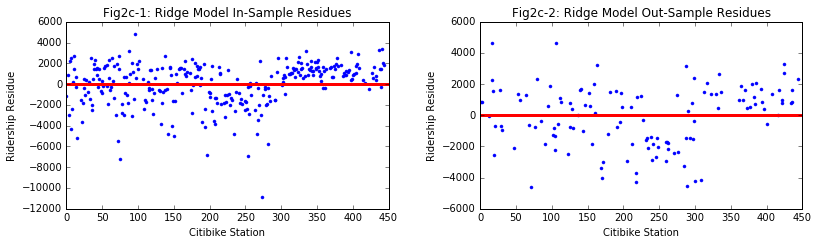

In [257]:
# Plot Residues
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121, title='Fig2c-1: Ridge Model In-Sample Residues',\
                     xlabel='Citibike Station', ylabel='Ridership Residue')
ax1.plot(err_IS_r, '.')
ax1.plot([0,450], [0,0], 'r',linewidth=3)

ax2 = fig.add_subplot(122, title='Fig2c-2: Ridge Model Out-Sample Residues',\
                     xlabel='Citibike Station', ylabel='Ridership Residue')
ax2.plot(err_OS_r, '.')
ax2.plot([0,450], [0,0], 'r',linewidth=3)

fig.tight_layout(pad=3)

**Figure 2c-1, 2c-2**: The residues in both graphs are not evenly distributed on each side of the 0 horizontal line. This means that the our Ridge model does not fit the data so well as we expected. It might be due to undetected outliers or that the correlation between the ridership and the public space factors is weak.

In [258]:
fig.savefig('../reports/figures/3.1-kz-Ridge Regression IS & OS Residue Figures.png')

## d. LASSO Regression

In [198]:
# Possible lambdas: 0.1, 1.0, 10.0, 50, 80, 1e2, 2*1e2, 5*1e2, 8*1e2, 1e3, 1e4, 1e5

LASSO = linear_model.LassoCV(n_alphas=20, alphas=None, \
                             fit_intercept=True, normalize=True, cv=4, positive=True, random_state=222, selection='random')

lm_l = LASSO.fit(X0_train, np.asarray(y0_train))

In [199]:
lm_l.alphas_

array([ 50.54915931,  35.14141141,  24.43005606,  16.98359898,
        11.80687567,   8.20805491,   5.70618064,   3.96689568,
         2.7577573 ,   1.91717301,   1.33280486,   0.92655634,
         0.64413529,   0.44779822,   0.31130609,   0.21641775,
         0.15045206,   0.10459319,   0.07271243,   0.05054916])

In [200]:
lm_l.mse_path_

array([[ 4187479.55017497,  6178972.92191939,  4216602.36760159,
         6419472.28031605],
       [ 3976875.07478882,  6022645.73340973,  3911139.12332971,
         5932632.88645085],
       [ 3852297.82109997,  5995766.18737591,  3755958.4254934 ,
         5604765.07660109],
       [ 3763314.82590513,  5874494.8750587 ,  3496502.49567904,
         5324118.24329369],
       [ 3746013.72829196,  5802682.3681921 ,  3353167.81436111,
         5059178.10618836],
       [ 3755508.65631305,  5774810.76413803,  3289166.46831013,
         4876291.80918443],
       [ 3772527.82211899,  5778727.46438067,  3261784.85803965,
         4769934.12198652],
       [ 3789476.630768  ,  5793926.32552716,  3251087.23008897,
         4710005.16253453],
       [ 3806480.18836028,  5811482.63352161,  3250031.68424422,
         4671824.45329605],
       [ 3819815.30688708,  5826827.52131983,  3252950.13449984,
         4647276.3025512 ],
       [ 3829798.56200209,  5838711.18646485,  3256600.59760505,
     

In [201]:
print ('Selected Lambda by 4 fold cross validation:\n {0} \
       \n\nLasso Model intercept: {1} \
       \nLasso Model coefficients: {2}'     
       .format(lm_l.alpha_, lm_l.intercept_, lm_l.coef_))

Selected Lambda by 4 fold cross validation:
 2.75775729747        

Lasso Model intercept: -107.019635487        
Lasso Model coefficients: [  2.02037116e+02   0.00000000e+00   0.00000000e+00   1.15181498e+03
   0.00000000e+00   0.00000000e+00   2.04608428e-02   1.10787901e+06]


### LASSO Model:
$$
Ridership  = 202.037 \times bike\_lane\_score +  1151.815 \times subway\_entrance + 0.020 \times median\_hh\_income + 1107879.01 \times pop\_density - 107.020
$$

### Lasso Model Evaluation

In [279]:
# Test In-Sample and OutofSample R^2
y0_pred_IS_l = lm_l.predict(X0_train)
y0_pred_IS_l = y0_pred_IS_l.reshape(300,1) # reshape to (212,1) from (212,)
err_IS_l = y0_pred_IS_l - y0_train

RSS_IS_l = sum(err_IS_l**2)
R_2_IS_l = 1 - np.var(err_IS_l)/np.var(y0_train)
print("The Redidual Sum of Square for IS is: {0}\nThe R-squared for IS Lasso is: {1}".format(RSS_IS_l.values, R_2_IS_l.values))

y0_pred_OS_l = lm_l.predict(X0_test) #compute the prediction for the test sample 
y0_pred_OS_l = y0_pred_OS_l.reshape(126,1)
 # reshape to (212,1) from (212,)
err_OS_l = y0_pred_OS_l - y0_test

RSS_OS_l = (err_OS_l**2).sum()
R_2_OS_l = 1 - np.var(err_OS_l)/np.var(y0_test)

print("\nThe Redidual Sum of Square for OS is: {0}\nThe R-squared for OS Lasso is: {1}".format(RSS_OS_l.values, R_2_OS_l.values))

The Redidual Sum of Square for IS is: [  1.25284129e+09]
The R-squared for IS Lasso is: [ 0.2158219]

The Redidual Sum of Square for OS is: [  4.49010171e+08]
The R-squared for OS Lasso is: [ 0.20564466]


### The R-squared are low and the sum of residue are high in both in-sample and out_sample tests.

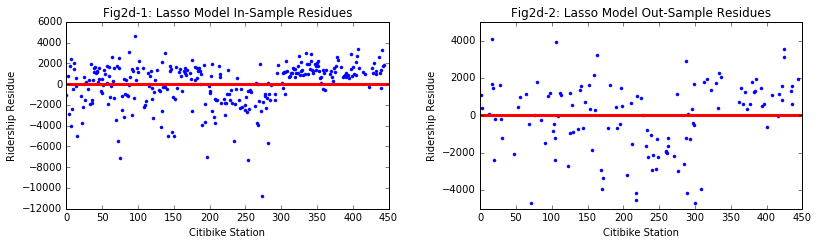

In [260]:
# Plot Residues
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121, title='Fig2d-1: Lasso Model In-Sample Residues',\
                    xlabel='Citibike Station', ylabel='Ridership Residue')
ax1.plot(err_IS_l, '.')
ax1.plot([0,450], [0,0], 'r',linewidth=3)

ax2 = fig.add_subplot(122, title='Fig2d-2: Lasso Model Out-Sample Residues',\
                     xlabel='Citibike Station', ylabel='Ridership Residue')
ax2.plot(err_OS_l, '.')
ax2.plot([0,450], [0,0], 'r',linewidth=3)

fig.tight_layout(pad=3)

**Figure 2d-1, 2d-2**: The residues in both graphs are not evenly distributed along the sizes of the 0 horizontal line. This means that the our model does not fit the data well as we expected. It might be due to undectected outliers or that the correlation between the ridership and the public space factors is weak.

In [261]:
fig.savefig('../reports/figures/3.1-kz-LASSO Regression IS & OS Residue Figures.png')

### --------------------------------------------------------------------------------------------------

# 3. Further Studies and Efforts
With further modification and colloection of data, we might need to build more models to better fit the data such as the following:

### a. Polynomial Model - Transformation on X

### b. Boxcox - Transformation on y
A Box-Cox normality plot shows graphically what the best transformation parameter is to use in boxcox to obtain a distribution that is close to normal.